In [1]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

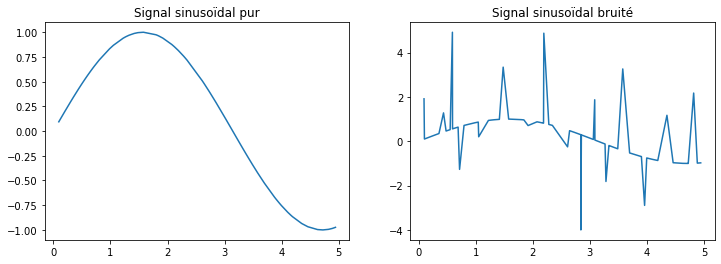

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 10 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

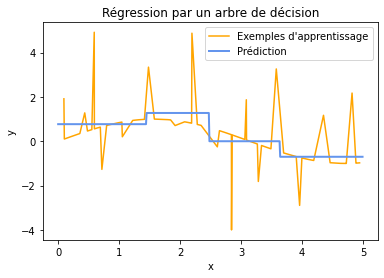

In [14]:
# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.plot(X,  y, c="orange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

In [24]:
diabetes = load_diabetes()
X , y = diabetes.data, diabetes.target

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [32]:
clf = DecisionTreeRegressor(max_depth=4)
# Apprentissage sur 70 % des données du set de données
clf.fit(X_train, y_train)
# Prédiction sur 30% des données du set de donnée (donnée test)
y_predicted = clf.predict(X_test)

In [33]:
# erreur quadratique moyenne
# Comparaison de l'estimation par rapport à donnée du test
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)

4477.749745885682

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
pgrid = {"max_depth": [2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)
# --> 4029.0729322641987
grid_search.best_params_
# -->{'max_depth': 2}

{'max_depth': 2}

[2, 3, 4, 5, 6, 7]
[-3729.18120513 -3907.97874542 -3801.64975512 -4216.4009386
 -4742.31900077 -5508.2758994 ]


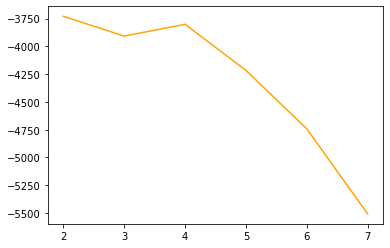

In [44]:
xx = [2, 3, 4, 5, 6, 7]
Z = grid_search.cv_results_['mean_test_score']
print(xx)
print(Z)
plt.figure()
plt.plot(xx,Z,c='orange')